# Zillow Work

## Imports

In [1]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

# import wrangle as w
import prepare as p

ModuleNotFoundError: No module named 'wrangle'

In [ ]:
df = w.wrangle_zillow()

df = p.encode_county(df)

w.check_columns(df)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,year,153,"[2005, 2011, 1926, 1972, 1973, 1960, 1950, 195...",0,0.0,int64
1,beds,19,"[4, 3, 0, 5, 2, 1, 6, 7, 8, 9, 25, 10, 11, 14,...",0,0.0,int64
2,baths,38,"[2.0, 4.0, 0.0, 1.0, 2.5, 3.5, 3.0, 5.5, 4.5, ...",0,0.0,float64
3,sqfeet,10557,"[3633, 1620, 2077, 1200, 171, 203, 1244, 1300,...",0,0.0,int64
4,prop_value,588178,"[296425, 847770, 646760, 5328, 6920, 14166, 16...",0,0.0,int64
5,prop_tax,46583,"[6941, 10244, 7924, 91, 255, 163, 2532, 3110, ...",0,0.0,int64
6,los_angeles,2,"[True, False]",0,0.0,bool
7,orange,2,"[False, True]",0,0.0,bool
8,ventura,2,"[False, True]",0,0.0,bool


## 2. Prep Data

In [ ]:
train, val, test = p.split_data(df)

train: 1284141 (60% of 2140235)
validate: 428047 (20% of 2140235)
test: 428047 (20% of 2140235)


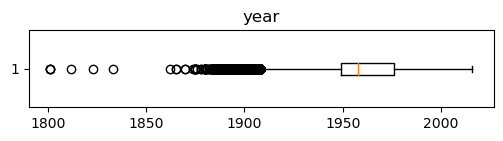

Number of results in lower quartile: 10688 (0.83%)
Number of results in inner quartile: 1273453 (99.17%)
Number of results in upper quartile: 0 (0.00%)


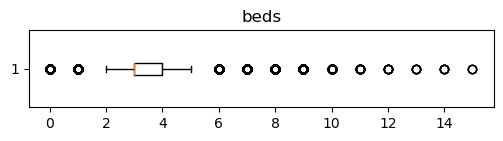

Number of results in lower quartile: 16491 (1.28%)
Number of results in inner quartile: 1248710 (97.24%)
Number of results in upper quartile: 18940 (1.47%)


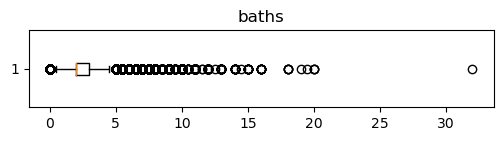

Number of results in lower quartile: 2631 (0.20%)
Number of results in inner quartile: 1248529 (97.23%)
Number of results in upper quartile: 32981 (2.57%)


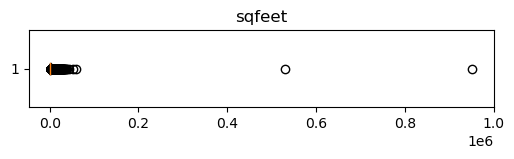

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 1226186 (95.49%)
Number of results in upper quartile: 57955 (4.51%)


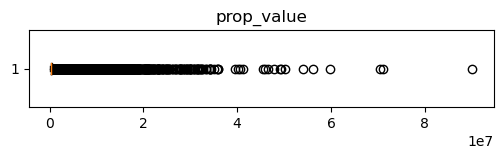

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 1201525 (93.57%)
Number of results in upper quartile: 82616 (6.43%)


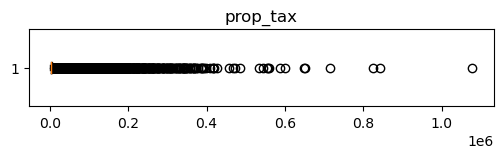

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 1196735 (93.19%)
Number of results in upper quartile: 87406 (6.81%)
Error: Could not generate box plot for column los_angeles. Skipping to next column...
Error: Could not generate box plot for column orange. Skipping to next column...
Error: Could not generate box plot for column ventura. Skipping to next column...


In [ ]:
w.box_plotter(train)

- `year` only has less than 1% outside of IQR, so we will scale with `MinMaxScaler`

- `beds` and `baths` have about 3% outside of IQR, so we will scale with `StandardScaler`

- `sqfeet` has about 5% outside of IQR, so we will scale with `StandardScaler`

- `prop_value` and `prop_tax` have almost 7% outside of IQR, so we will scale with `StandardScaler`

In [ ]:
min_max_scale_column = ['year']

train = p.min_max_scaler(train, min_max_scale_column)
val = p.min_max_scaler(val, min_max_scale_column)
test = p.min_max_scaler(test, min_max_scale_column)

In [ ]:
standard_scale_columns = ['beds', 'baths', 'sqfeet', 'prop_tax']

train = p.standard_scaler(train, standard_scale_columns)
val = p.standard_scaler(val, standard_scale_columns)
test = p.standard_scaler(test, standard_scale_columns)

In [ ]:
w.check_columns(train)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,year,148,"[0.81860465116279, 0.7720930232558132, 0.75348...",0,0.0,float64
1,beds,16,"[0.7486360326072428, -0.3233970282054821, -1.3...",0,0.0,float64
2,baths,37,"[-0.24293851459358312, 0.26075165615222073, 0....",0,0.0,float64
3,sqfeet,9564,"[0.2710775112520545, 0.08088691402503657, -0.0...",0,0.0,float64
4,prop_value,446672,"[377671, 687000, 625494, 557360, 205082, 19771...",0,0.0,int64
5,prop_tax,39589,"[-0.18326486965869346, 0.18661505958534533, 0....",0,0.0,float64
6,los_angeles,2,"[False, True]",0,0.0,bool
7,orange,2,"[True, False]",0,0.0,bool
8,ventura,2,"[False, True]",0,0.0,bool


In [ ]:
w.check_columns(val)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,year,142,"[0.7177033492822975, 0.588516746411484, 0.7751...",0,0.0,float64
1,beds,16,"[-0.3221024485562989, -1.3968912855405613, 0.7...",0,0.0,float64
2,baths,31,"[-0.24171916586911776, -1.2553677325244692, 0....",0,0.0,float64
3,sqfeet,7469,"[-0.49509219367995444, -0.2991151232007222, 0....",0,0.0,float64
4,prop_value,219378,"[71604, 48719, 438963, 397233, 2557712, 386856...",0,0.0,int64
5,prop_tax,27569,"[-0.5903465547440748, -0.6497272250006921, -0....",0,0.0,float64
6,los_angeles,2,"[True, False]",0,0.0,bool
7,orange,2,"[False, True]",0,0.0,bool
8,ventura,2,"[False, True]",0,0.0,bool


In [ ]:
w.check_columns(test)

,Column Name,Number of Unique Values,Unique Values,Number of Null Values,Proportion of Null Values,dtype
0,year,141,"[0.7401960784313726, 0.9117647058823533, 0.882...",0,0.0,float64
1,beds,19,"[-0.3237214696853841, -1.3942075790023054, 0.7...",0,0.0,float64
2,baths,32,"[-0.24269378626437385, 0.2632939743371873, 1.2...",0,0.0,float64
3,sqfeet,7470,"[-0.46973726806952804, 0.06727393822902791, 1....",0,0.0,float64
4,prop_value,219362,"[186697, 587421, 796473, 848481, 251385, 85611...",0,0.0,int64
5,prop_tax,27685,"[-0.3772074872269071, 0.2083303292291557, 0.49...",0,0.0,float64
6,los_angeles,2,"[True, False]",0,0.0,bool
7,orange,2,"[False, True]",0,0.0,bool
8,ventura,2,"[False, True]",0,0.0,bool


In [ ]:
# Property tax is close to the same thing as value and isn't valuable, so we'll drop it with our target

X_train = train.drop(columns=['prop_value'])
X_val = val.drop(columns=['prop_value'])
X_test = test.drop(columns=['prop_value'])

y_train = train[['prop_value']]
y_val = val[['prop_value']]
y_test = test[['prop_value']]

## 3. Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

### Baseline (Mean and Median)

In [ ]:
# Calculate the mean of the target variable on the training set
pred_mean = y_train.mean()[0]

# Assign the mean to a new column in y_train and y_val
y_train = y_train.assign(pred_mean=pred_mean)
y_val = y_val.assign(pred_mean=pred_mean)

# Calculate the median of the target variable on the training set
pred_median = y_train.median()[0]

# Assign the median to a new column in y_train and y_val
y_train = y_train.assign(pred_median=pred_median)
y_val = y_val.assign(pred_median=pred_median)

# Calculate the RMSE and R2 scores for the pred_mean model on both the training and validation sets
rmse_tr = mean_squared_error(y_train.prop_value,y_train.pred_mean)**.5
rmse_v = mean_squared_error(y_val.prop_value,y_val.pred_mean)**.5
r2_tr = r2_score(y_train.prop_value, y_train.pred_mean)
r2_v = r2_score(y_val.prop_value, y_val.pred_mean)

# Print the RMSE scores for the pred_mean model on both the training and validation sets
print(f"Mean Model")
print(f'RMSE Train: {rmse_tr}\nRMSE Val: {rmse_v}')

# Store the RMSE and R2 scores for the pred_mean model in a dictionary and append it to a list
metrics_info = {
        'model':'bl_mean',
        'rmse_train':rmse_tr,
        'rmse_val':rmse_v,
        'r2_train':r2_tr,
        'r2_val':r2_v
    }
metrics_list = [metrics_info]

# Calculate the RMSE and R2 scores for the pred_median model on both the training and validation sets
rmse_tr = mean_squared_error(y_train.prop_value,y_train.pred_median)**.5
rmse_v = mean_squared_error(y_val.prop_value,y_val.pred_median)**.5
r2_tr = r2_score(y_train.prop_value, y_train.pred_median)
r2_v = r2_score(y_val.prop_value, y_val.pred_median)

# Print the RMSE scores for the pred_median model on both the training and validation sets
print(f'\nMedian Model')
print(f'RMSE Train: {rmse_tr}\nRMSE Val: {rmse_v}')

# Store the RMSE and R2 scores for the pred_median model in a dictionary and append it to the list
metrics_info = {
        'model':'bl_median',
        'rmse_train':rmse_tr,
        'rmse_val':rmse_v,
        'r2_train':r2_tr,
        'r2_val':r2_v
    }
metrics_list.append(metrics_info)

Mean Model
RMSE Train: 685092.7520768072
RMSE Val: 675664.9319306092

Median Model
RMSE Train: 697808.0690827165
RMSE Val: 688126.8771199604


### LinearRegression

In [ ]:
# Create a LinearRegression object
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train[['prop_value']])

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_lr=lr.predict(X_train))
y_val = y_val.assign(pred_lr=lr.predict(X_val))

# Calculate the RMSE and R2 scores for the model on both the training and validation sets
rmse_tr = mean_squared_error(y_train[['prop_value']],y_train.pred_lr)**.5
rmse_v = mean_squared_error(y_val[['prop_value']],y_val.pred_lr)**.5
r2_tr = r2_score(y_train.prop_value, y_train.pred_lr)
r2_v = r2_score(y_val.prop_value, y_val.pred_lr)

# Print the RMSE scores for the model on both the training and validation sets
print(f'LinearRegression')
print(f'RMSE Train: {rmse_tr}\nRMSE Validate: {rmse_v}')

# Store the RMSE and R2 scores for the model in a dictionary and append it to the list
metrics_info = {
        'model':'LinearRegression',
        'rmse_train':rmse_tr,
        'rmse_val':rmse_v,
        'r2_train':r2_tr,
        'r2_val':r2_v
    }
metrics_list.append(metrics_info)

LinearRegression
RMSE Train: 89872.75012371402
RMSE Validate: 83036.75581587182


### LassoLars

In [ ]:
# Create a LassoLars object with alpha=1 and normalize=False
ll = LassoLars(alpha=1,normalize=False)

# Fit the model to the training data
ll.fit(X_train,y_train[['prop_value']])

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_ll=ll.predict(X_train))
y_val = y_val.assign(pred_ll=ll.predict(X_val))

# Calculate the RMSE and R2 scores for the model on both the training and validation sets
rmse_tr = mean_squared_error(y_train[['prop_value']],y_train.pred_ll)**.5
rmse_v = mean_squared_error(y_val[['prop_value']],y_val.pred_ll)**.5
r2_tr = r2_score(y_train.prop_value, y_train.pred_ll)
r2_v = r2_score(y_val.prop_value, y_val.pred_ll)

# Print the RMSE scores for the model on both the training and validation sets
print('LassoLars')
print(f'RMSE train: {rmse_tr}\nRMSE val: {rmse_v}')

# Store the RMSE and R2 scores for the model in a dictionary and append it to the list
metrics_info = {
        'model':'LassoLars',
        'rmse_train':rmse_tr,
        'rmse_val':rmse_v,
        'r2_train':r2_tr,
        'r2_val':r2_v
    }
metrics_list.append(metrics_info)

LassoLars
RMSE train: 89872.73935475243
RMSE val: 83037.8008915454


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_base.py:116: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


### PolynomialFeatures

In [ ]:
# Create a PolynomialFeatures object with degree=2
pf = PolynomialFeatures(degree=2)

# Transform the training and validation sets to degree 2
X_train_d2 = pf.fit_transform(X_train)
X_val_d2 = pf.transform(X_val)

# Create a LinearRegression object
lp = LinearRegression()

# Fit the model to the training data
lp.fit(X_train_d2,y_train[['prop_value']])

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_lp=lp.predict(X_train_d2))
y_val = y_val.assign(pred_lp=lp.predict(X_val_d2))

# Calculate the RMSE and R2 scores for the model on both the training and validation sets
rmse_tr = mean_squared_error(y_train[['prop_value']],y_train.pred_lp)**.5
rmse_v = mean_squared_error(y_val[['prop_value']],y_val.pred_lp)**.5
r2_tr = r2_score(y_train.prop_value, y_train.pred_lp)
r2_v = r2_score(y_val.prop_value, y_val.pred_lp)

# Print the RMSE scores for the model on both the training and validation sets
print(f'rmse tr:{rmse_tr}\nrmse v: {rmse_v}')

# Store the RMSE and R2 scores for the model in a dictionary and append it to the list
metrics_info = {
        'model':'PolynomialRegression',
        'rmse_train':rmse_tr,
        'rmse_val':rmse_v,
        'r2_train':r2_tr,
        'r2_val':r2_v
    }
metrics_list.append(metrics_info)

rmse tr:86445.90708034096
rmse v: 80132.97492875303


### TweedieRegressor (GLM)

In [ ]:
# Create a TweedieRegressor object with power=1 and alpha=0
tweedie_reg = TweedieRegressor(power=1,alpha=0)

# Fit the model to the training data
tweedie_reg.fit(X_train,y_train.prop_value)

# Make predictions on the training and validation sets
y_train = y_train.assign(pred_tweedie=tweedie_reg.predict(X_train))
y_val = y_val.assign(pred_tweedie=tweedie_reg.predict(X_val))

# Calculate the RMSE and R2 scores for the model on both the training and validation sets
rmse_tr = mean_squared_error(y_train[['prop_value']],y_train.pred_tweedie)**.5
rmse_v = mean_squared_error(y_val[['prop_value']],y_val.pred_tweedie)**.5
r2_tr = r2_score(y_train.prop_value, y_train.pred_tweedie)
r2_v = r2_score(y_val.prop_value, y_val.pred_tweedie)

# Print the RMSE scores for the model on both the training and validation sets
print(f'rmse tr:{rmse_tr}\nrmse v: {rmse_v}')

# Store the RMSE and R2 scores for the model in a dictionary and append it to the list
metrics_info = {
        'model':'TweedieRegressor',
        'rmse_train':rmse_tr,
        'rmse_val':rmse_v,
        'r2_train':r2_tr,
        'r2_val':r2_v
    }
metrics_list.append(metrics_info)

rmse tr:3702132.3104825877
rmse v: 6228452.361942972


In [ ]:
metrics_df = pd.DataFrame(metrics_list,)

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
metrics_df

,model,rmse_train,rmse_val,r2_train,r2_val
0,bl_mean,685092.7521,675664.9319,0.0000,-0.0000
1,bl_median,697808.0691,688126.8771,-0.0375,-0.0372
2,LinearRegression,89872.7501,83036.7558,0.9828,0.9849
3,LassoLars,89872.7394,83037.8009,0.9828,0.9849
4,PolynomialRegression,86445.9071,80132.9749,0.9841,0.9859
5,TweedieRegressor,3702132.3105,6228452.3619,-28.2015,-83.9772


# Notes

## Terminology


### Distribution Types



#### Discrete Distributions



##### Discrete uniform distribution: 

All outcomes are equally likely

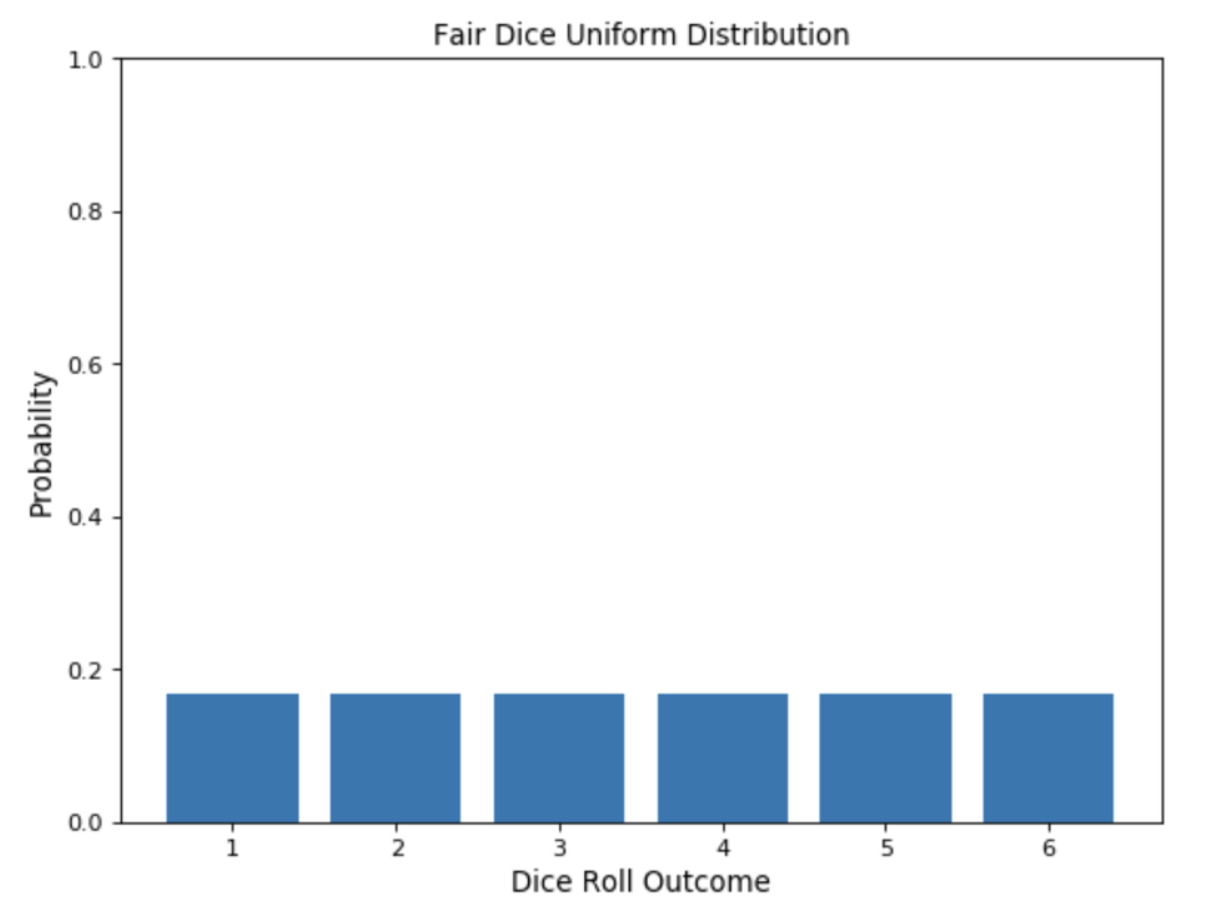



#### Bernoulli Distribution: 

Single-trial with two possible outcomes

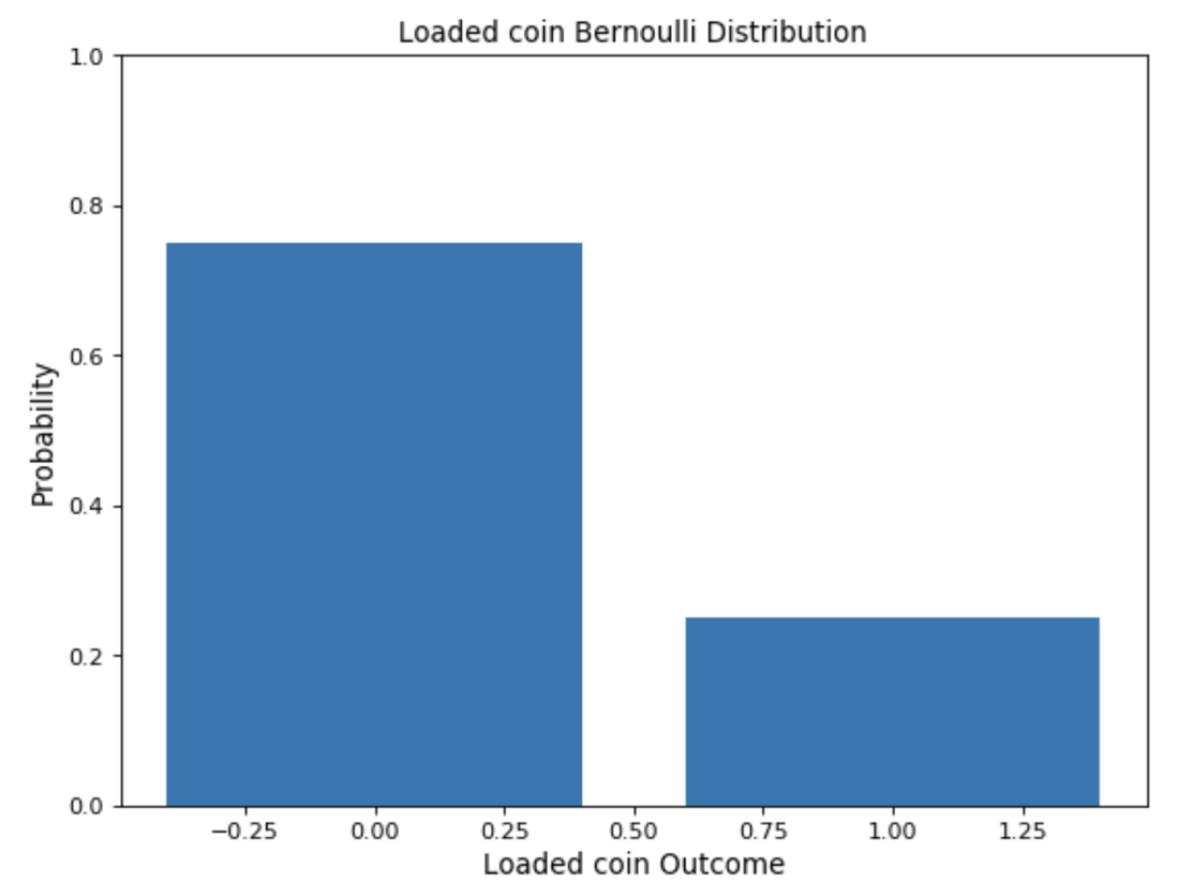


#### Binomial Distribution: 

A sequence of Bernoulli events

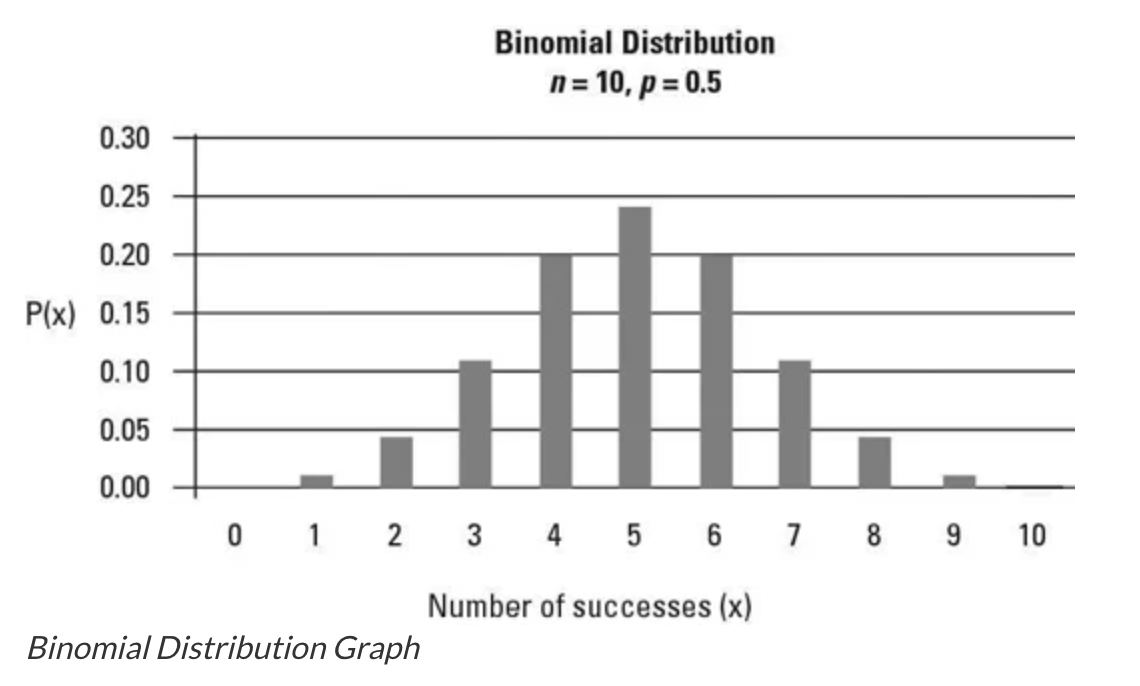


#### Poisson Distribution:

The probability that an event may or may not occur

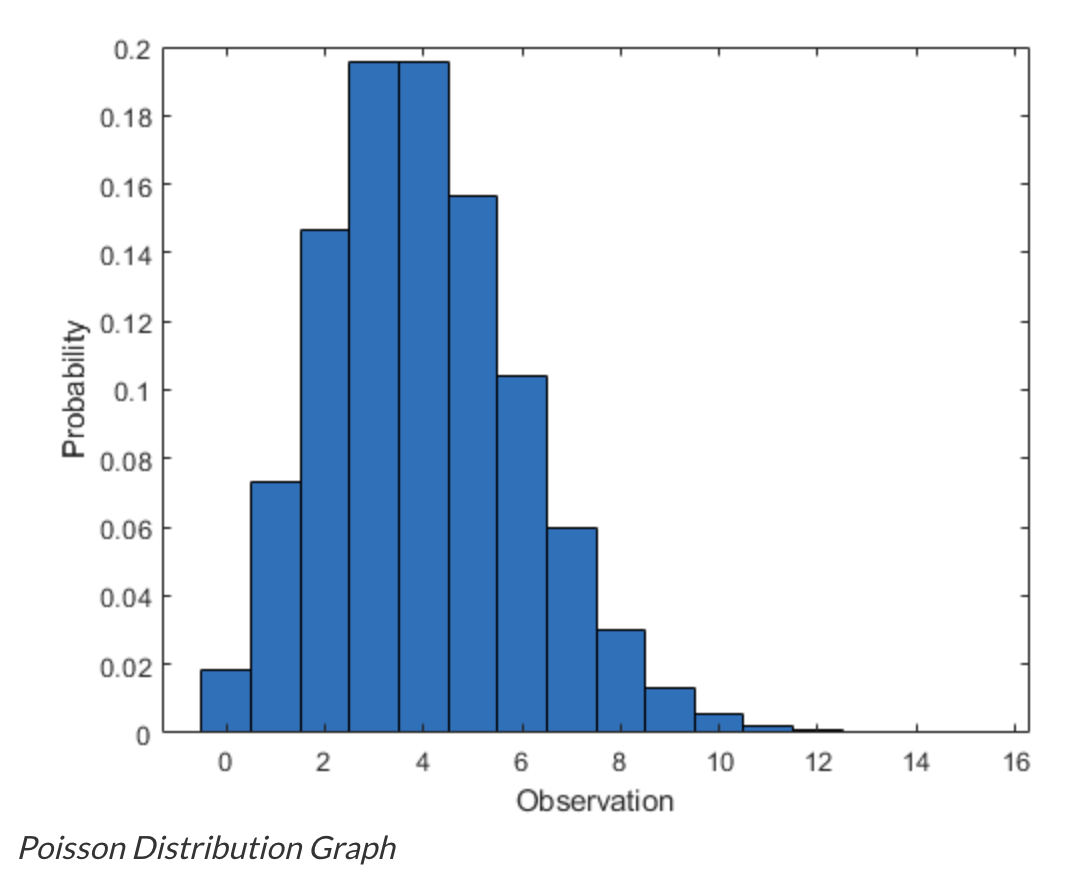



### Classification models predict a categorical or discrete output variable.

In classification, the goal is to predict a categorical or discrete output variable based on one or more input variables. The output variable is usually a label or a class, such as "spam" or "not spam", "cat" or "dog", or "positive" or "negative". Classification algorithms include logistic regression, decision trees, random forests, support vector machines, and neural networks.



### Regression models predict a continuous or numerical output variable.

In regression, the goal is to predict a continuous or numerical output variable based on one or more input variables. The output variable can take on any value within a range, such as the price of a house, the temperature, or the stock price. Regression algorithms include linear regression, polynomial regression, decision trees, random forests, support vector regression, and neural networks.

The main difference between classification and regression models is the type of output variable they predict.  The choice between classification and regression depends on the specific problem and the type of output variable that needs to be predicted.

Bias and variance are two types of errors that can occur in machine learning models.

The goal of machine learning is to find a model that has low bias and low variance, which is called the bias-variance tradeoff. This can be achieved by tuning the complexity of the model, such as by adding or removing features, adjusting the regularization parameter, or changing the model architecture.



### Bias: 

refers to the error that is introduced by approximating a real-world problem with a simplified model. A model with high bias is too simple and does not capture the complexity of the real-world problem. This can lead to underfitting, where the model is unable to capture the underlying patterns in the data and has high error on both the training and test sets.



### Variance:

refers to the error that is introduced by the model being too sensitive to the noise in the training data. A model with high variance is too complex and captures the noise in the training data as well as the underlying patterns. This can lead to overfitting, where the model performs well on the training set but has high error on the test set.
 


## Common Regression Algorithms


### Ordinary Least Squares (OLS):

This is a linear regression algorithm that finds the line of best fit that minimizes the sum of the squared errors between the predicted and actual values. It is a simple and fast algorithm that works well when the relationship between the independent and dependent variables is linear and there are no outliers.



### ASSO + LARS:

These are linear regression algorithms that use L1 regularization to shrink the coefficients of the independent variables towards zero. LASSO is useful when there are many independent variables and some of them are irrelevant, while LARS is useful when there are many independent variables and they are highly correlated.


### Polynomial Regression:

This is a linear regression algorithm that models the relationship between the independent and dependent variables as an nth-degree polynomial. It is useful when the relationship between the independent and dependent variables is non-linear and cannot be captured by a straight line.

- more curves, more likely to be overfit


### Generalized Linear Model (TweedieRegressor) (GLM):

This is a flexible regression algorithm that can handle a wide range of data distributions and link functions. It is useful when the dependent variable is not normally distributed or when the relationship between the independent and dependent variables is non-linear.

The most flexible regression algorithm, the GLM allows for different distributions, beyond just the Normal Distribution for OLS (and other models based on OLS, like LASSO). We will use the TweedieRegressor method to create a GLM using sklearn.

Powers 

```python
TweedieRegressor(power=1, alpha=0)
```

#### Normal Distribution (power = 0)

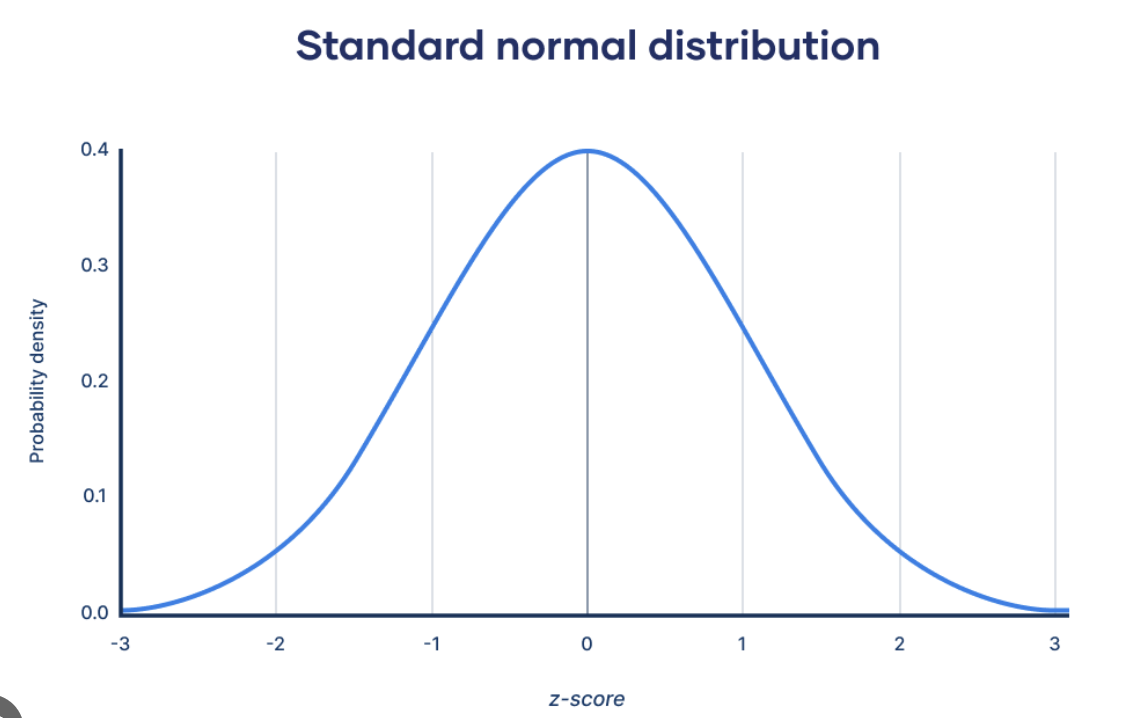

#### Poisson Distribution (power = 1)


#### Compound Distribution (power = (1,2))


#### Gamma Distribution (power = 2)


#### Inverse Gaussian Distribution (power = 3)